In [1]:
import numpy as np
import h5py
from tvb.datatypes.connectivity import Connectivity
from matplotlib import pyplot as plt

WEIGHTED_AVERAGE_CENTRES = [True, False]
TRACT_LENGTHS_MODES = ["weighted_average", "euclidean"]
CONN_TYPES = ["SummedSubcortical", "SummedSubcortical_Thals"]

%matplotlib inline


def read_connectivity(conn_name="Connectivity", conn_type=""):
    # Load connnectivity from file:
    f = h5py.File("%s_%s.h5" % (conn_name, conn_type))
    connectivity = Connectivity(weights=np.array(f["weights"][()]).T, 
                                tract_lengths=np.array(f["tract_lengths"][()]), 
                                centres=np.array(f["centres"][()]), # hemispheres=np.array(f["hemispheres"][()]),
                                region_labels=np.array(f["region_labels"][()]).astype("<U128"))
    f.close()
    return connectivity



def read_all_files(conn_name="Connectivity", conn_type=""):
    tls = []
    for wac in WEIGHTED_AVERAGE_CENTRES:
        tls.append([])
        conn_name1 = conn_name
        if wac:
            conn_name1 += "_wavCntrs"
        else:
            conn_name1 += "_avCntrs"
        for tlm in TRACT_LENGTHS_MODES:
            conn_name2 = conn_name1
            if tlm == "euclidean":
                conn_name2 += "_TLed"
            else:
                conn_name2 += "_TLwav"
            # Write the resulting connectivity to .h5 TVB compatible file...
            print("Reading %s_%s.h5" % (conn_name2, conn_type))
            conn = read_connectivity(conn_name2, conn_type)
            tls[-1].append(conn.tract_lengths)
    return np.array(tls)

    
def plot_tls(tls): 
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    img = []
    axcb = []
    for iC, wac in enumerate(WEIGHTED_AVERAGE_CENTRES):
        if wac:
            ylbl = "Weighted average centers"
        else:
            ylbl = "Average centers"
        for iT, tlm in enumerate(TRACT_LENGTHS_MODES):
            if tlm == "euclidean":
                title = "Euclidean Distance tract lengths" 
            else:
                title = "Weighted Average tract lengths"
            img.append(axes[iC, iT].imshow(tls[iC, iT], cmap='jet', aspect='equal', interpolation='none'))
            axes[iC, iT].set_ylabel(ylbl)
            axes[iC, iT].set_title(title)
            axcb.append(plt.colorbar(img[-1], ax=axes[iC, iT]))
            axcb[-1].set_label('Lengths', fontsize=12)
            
    fig.show()
    plt.savefig("MergedTractLengths.png")
    return fig, axes
    

def plot_tls_diffs(tls): 
    fig, axes = plt.subplots(4, 4, figsize=(30, 30))
    img = []
    axcb = []
    for iC1, wac1 in enumerate(WEIGHTED_AVERAGE_CENTRES):
        if wac1:
            row1 = "wav"
        else:
            row1 = "av"
        for iT1, tlm1 in enumerate(TRACT_LENGTHS_MODES):
            iR = iC1*2 + iT1
            for iC2, wac2 in enumerate(WEIGHTED_AVERAGE_CENTRES):
                if wac2:
                    col1 = "wav"
                else:
                    col1 = "av"
                for iT2, tlm2 in enumerate(TRACT_LENGTHS_MODES):
                    iC = iC2*2 + iT2
                    tlsdiff = (tls[iC1, iT1] - tls[iC2, iT2]) / tls[iC1, iT1] * 100
                    tlsdiff[tls[iC1, iT1] == 0.0] = 0.0
                    img.append(axes[iR, iC].imshow(tlsdiff, cmap='jet', aspect='equal', interpolation='none'))
                    axes[iR, iC].set_title("(%s, %s) - (%s, %s)" % (row1, tlm1, col1, tlm2))
                    axes[iR, iC].set_xlabel("min=%g, mean=%g, max=%g" 
                                            % (tlsdiff.min(), tlsdiff.mean(), tlsdiff.max()))
                    axcb.append(plt.colorbar(img[-1], ax=axes[iR, iC]))
                    axcb[-1].set_label('Lengths diff%', fontsize=12)
            
    fig.show()
    plt.savefig("MergedTractLengthsDiffs100%.png")
    return fig, axes

In [2]:
tls = read_all_files(conn_type="SummedSubcortical")

Reading Connectivity_wavCntrs_TLwav_SummedSubcortical.h5
Reading Connectivity_wavCntrs_TLed_SummedSubcortical.h5
Reading Connectivity_avCntrs_TLwav_SummedSubcortical.h5
Reading Connectivity_avCntrs_TLed_SummedSubcortical.h5


(<Figure size 1080x1080 with 8 Axes>,
 array([[<AxesSubplot:title={'center':'Weighted Average tract lengths'}, ylabel='Weighted average centers'>,
         <AxesSubplot:title={'center':'Euclidean Distance tract lengths'}, ylabel='Weighted average centers'>],
        [<AxesSubplot:title={'center':'Weighted Average tract lengths'}, ylabel='Average centers'>,
         <AxesSubplot:title={'center':'Euclidean Distance tract lengths'}, ylabel='Average centers'>]],
       dtype=object))

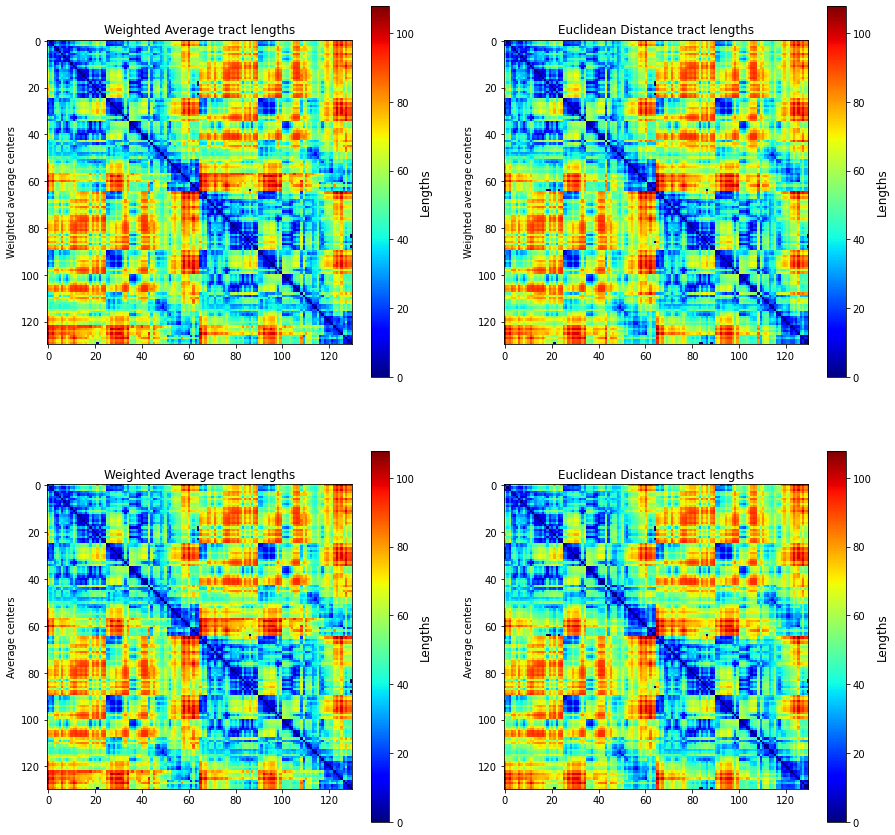

In [3]:
plot_tls(tls)

/tmp/ipykernel_234/1143186717.py:105: RuntimeWarning: invalid value encountered in true_divide
  tlsdiff = (tls[iC1, iT1] - tls[iC2, iT2]) / tls[iC1, iT1] * 100
/tmp/ipykernel_234/1143186717.py:105: RuntimeWarning: divide by zero encountered in true_divide
  tlsdiff = (tls[iC1, iT1] - tls[iC2, iT2]) / tls[iC1, iT1] * 100


(<Figure size 2160x2160 with 32 Axes>,
 array([[<AxesSubplot:title={'center':'(wav, weighted_average) - (wav, weighted_average)'}, xlabel='min=0, mean=0, max=0'>,
         <AxesSubplot:title={'center':'(wav, weighted_average) - (wav, euclidean)'}, xlabel='min=-142.158, mean=-0.192124, max=100'>,
         <AxesSubplot:title={'center':'(wav, weighted_average) - (av, weighted_average)'}, xlabel='min=0, mean=0, max=0'>,
         <AxesSubplot:title={'center':'(wav, weighted_average) - (av, euclidean)'}, xlabel='min=-111.41, mean=0.285395, max=100'>],
        [<AxesSubplot:title={'center':'(wav, euclidean) - (wav, weighted_average)'}, xlabel='min=-271.201, mean=-0.723301, max=58.7046'>,
         <AxesSubplot:title={'center':'(wav, euclidean) - (wav, euclidean)'}, xlabel='min=0, mean=0, max=0'>,
         <AxesSubplot:title={'center':'(wav, euclidean) - (av, weighted_average)'}, xlabel='min=-271.201, mean=-0.723301, max=58.7046'>,
         <AxesSubplot:title={'center':'(wav, euclidean) - (av, 

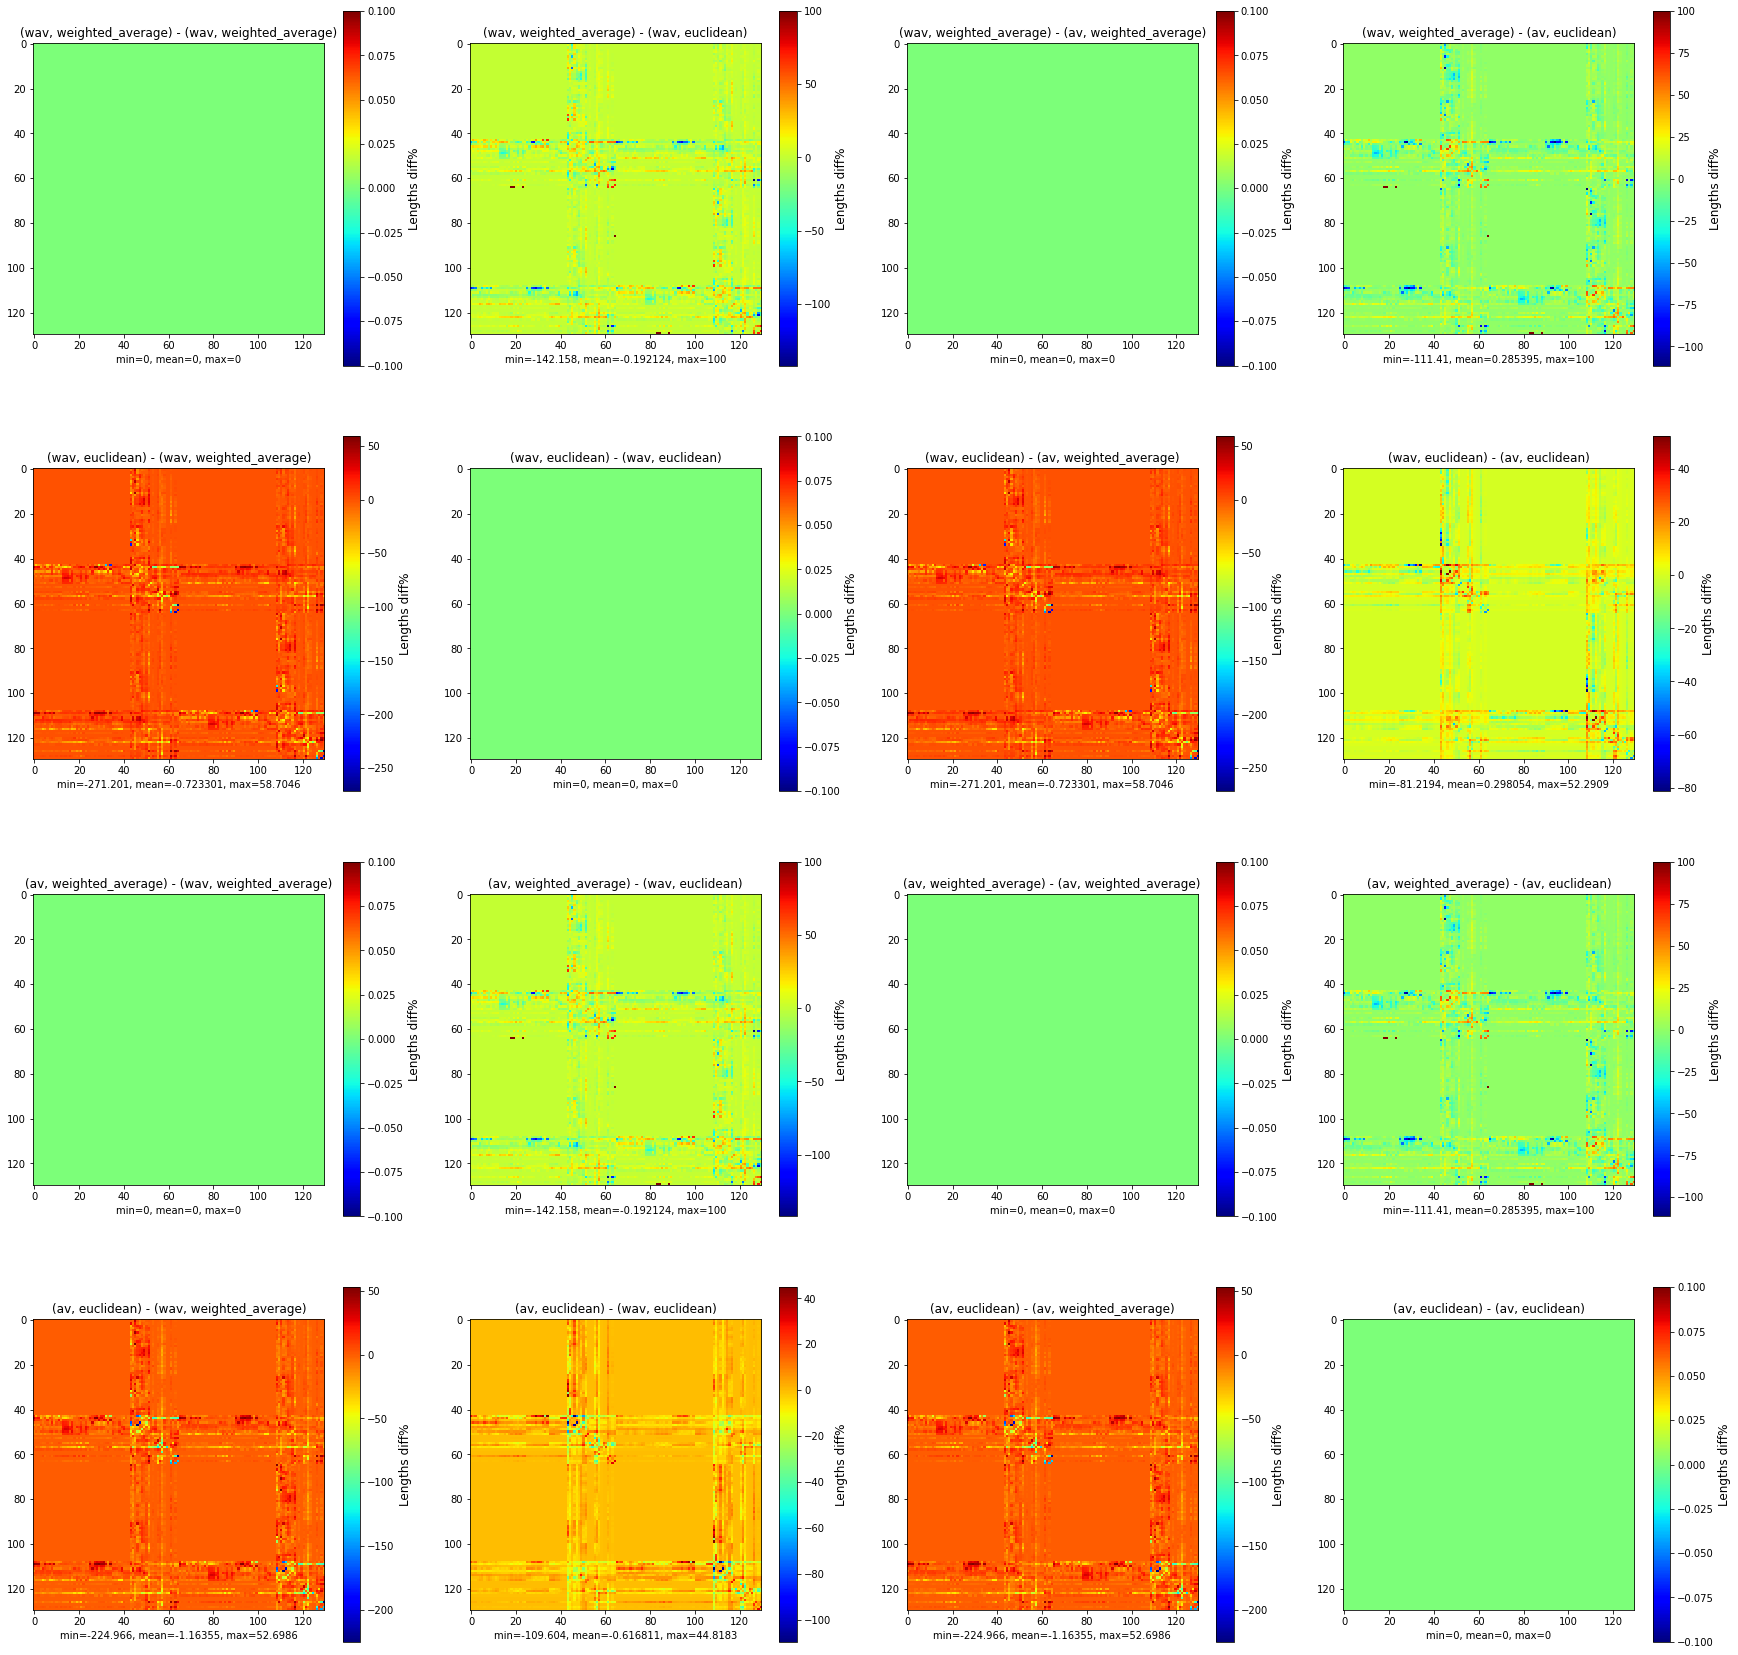

In [4]:
plot_tls_diffs(tls)